In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = datasets.load_digits()

<Figure size 432x288 with 0 Axes>

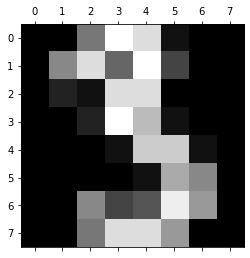

In [3]:
plt.gray()
plt.matshow(data.images[3])
plt.show()

In [4]:
x = data.data
y = data.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# Função para achar o melhor valor de K
def encontra_K(x, y,clf,cv) :
    k = KFold(n_splits=cv)
    valores = []
    for i,j in k.split(x):
        teste = x[j]
        label = y[j]
        valores.append(accuracy_score(label,clf.predict(teste)))
    return valores

In [7]:
k = np.arange(20) + 1
parametros = {'n_neighbors':k}

In [8]:
modelo = KNeighborsClassifier()
modelo = GridSearchCV(modelo, parametros, cv=10)

In [9]:
acc = []
params = []
dimensao = [1,2,3,4,5,6,7,8,9,10]

In [10]:
# Executando o modelo
for d in dimensao:
    svd = TruncatedSVD(n_components = d)       
    if d < 11:
        x_treino = svd.fit_transform(x_train)
        x_teste = svd.transform(x_test)
    else:
        X_nl = X_treino
        X_nl1 = X_teste
        
    modelo.fit(x_treino, y_train)
    
    acc.append(encontra_K(x_teste, y_test, clf = modelo, cv = 10))
    params.append(modelo.best_params_['n_neighbors'])

In [11]:
acc

[[0.16666666666666666,
  0.16666666666666666,
  0.08333333333333333,
  0.08333333333333333,
  0.1111111111111111,
  0.08333333333333333,
  0.1388888888888889,
  0.1111111111111111,
  0.05555555555555555,
  0.1111111111111111],
 [0.4722222222222222,
  0.4166666666666667,
  0.5,
  0.3333333333333333,
  0.4722222222222222,
  0.3055555555555556,
  0.3055555555555556,
  0.3611111111111111,
  0.2777777777777778,
  0.4166666666666667],
 [0.75,
  0.6944444444444444,
  0.7222222222222222,
  0.6666666666666666,
  0.75,
  0.6388888888888888,
  0.6944444444444444,
  0.6944444444444444,
  0.6666666666666666,
  0.7222222222222222],
 [0.6666666666666666,
  0.8611111111111112,
  0.8333333333333334,
  0.75,
  0.8611111111111112,
  0.7222222222222222,
  0.75,
  0.6944444444444444,
  0.7222222222222222,
  0.8333333333333334],
 [0.8333333333333334,
  0.8888888888888888,
  0.8333333333333334,
  0.75,
  0.8888888888888888,
  0.8888888888888888,
  0.8611111111111112,
  0.7777777777777778,
  0.777777777777777

In [12]:
modelo.best_params_

{'n_neighbors': 1}

In [13]:
# Alterando parâmentros
modelo2 = KNeighborsClassifier(metric='hamming')
modelo2 = GridSearchCV(modelo2, parametros, cv=10)

acc2 = []
params2 = []

for d in dimensao:
    svd = TruncatedSVD(n_components = d)       
    if d < 11:
        x_treino = svd.fit_transform(x_train)
        x_teste = svd.transform(x_test)
    else:
        X_nl = x_train
        X_nl1 = x_test
        
    modelo2.fit(x_treino, y_train)
    
    acc2.append(encontra_K(x_teste, y_test, clf = modelo2, cv = 10))
    params2.append(modelo2.best_params_['n_neighbors'])
    
acc2

[[0.027777777777777776,
  0.1111111111111111,
  0.1111111111111111,
  0.08333333333333333,
  0.027777777777777776,
  0.1111111111111111,
  0.1111111111111111,
  0.08333333333333333,
  0.05555555555555555,
  0.08333333333333333],
 [0.1111111111111111,
  0.027777777777777776,
  0.08333333333333333,
  0.1111111111111111,
  0.1388888888888889,
  0.027777777777777776,
  0.05555555555555555,
  0.08333333333333333,
  0.05555555555555555,
  0.19444444444444445],
 [0.1111111111111111,
  0.027777777777777776,
  0.08333333333333333,
  0.1111111111111111,
  0.1388888888888889,
  0.027777777777777776,
  0.05555555555555555,
  0.08333333333333333,
  0.05555555555555555,
  0.19444444444444445],
 [0.1111111111111111,
  0.027777777777777776,
  0.08333333333333333,
  0.1111111111111111,
  0.1388888888888889,
  0.027777777777777776,
  0.05555555555555555,
  0.08333333333333333,
  0.05555555555555555,
  0.19444444444444445],
 [0.08333333333333333,
  0.08333333333333333,
  0.08333333333333333,
  0.02777777

In [14]:
modelo2.best_params_

{'n_neighbors': 2}